In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from ml_pipeline.pipeline import run_pipeline


In [8]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
task_type = "regression"
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [10]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


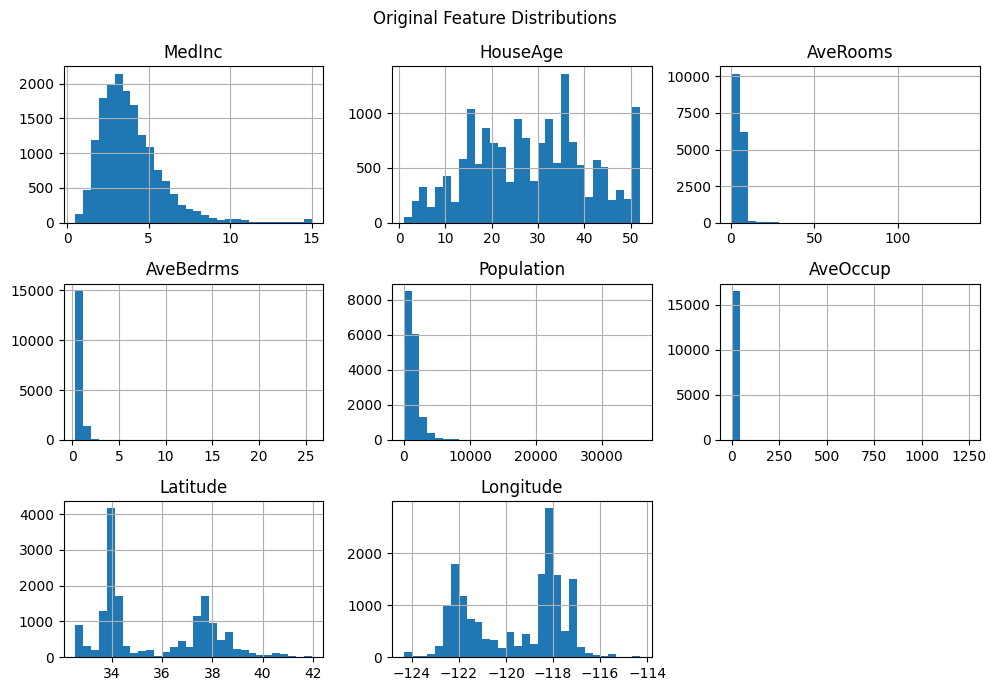

In [30]:
X_train.hist(bins=30, figsize=(10,7))
plt.suptitle("Original Feature Distributions")
plt.tight_layout()
plt.show()


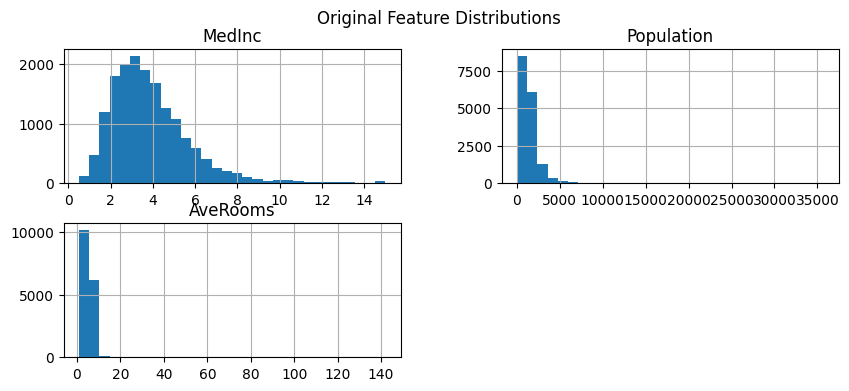

In [21]:
skewed_features = ["MedInc", "Population", "AveRooms"]

X_train[skewed_features].hist(bins=30, figsize=(10,4))
plt.suptitle("Original Feature Distributions")
plt.show()


In [22]:
X_train_p1 = X_train.copy()
X_test_p1 = X_test.copy()

# Log transforms
for col in ["MedInc", "Population", "AveRooms"]:
    X_train_p1[f"log_{col}"] = np.log(X_train_p1[col] + 1e-6)
    X_test_p1[f"log_{col}"] = np.log(X_test_p1[col] + 1e-6)

# Squared terms
for col in ["HouseAge", "AveRooms"]:
    X_train_p1[f"{col}_sq"] = X_train_p1[col] ** 2
    X_test_p1[f"{col}_sq"] = X_test_p1[col] ** 2


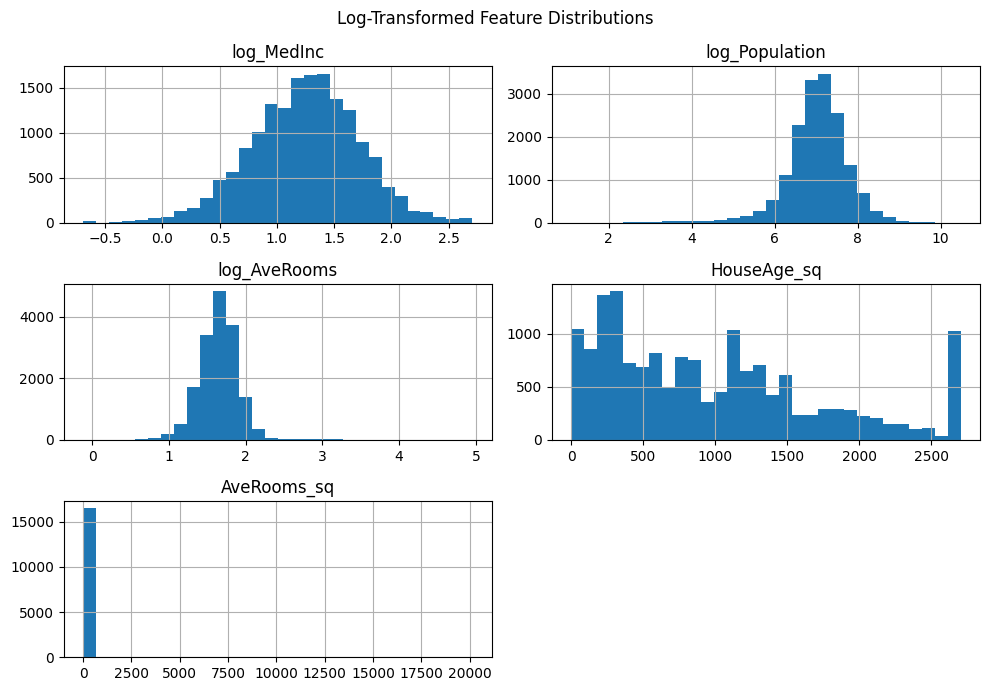

In [31]:
X_train_p1[["log_MedInc", "log_Population","log_AveRooms","HouseAge_sq","AveRooms_sq"]].hist(bins=30, figsize=(10,7))
plt.suptitle("Log-Transformed Feature Distributions")
plt.tight_layout()
plt.show()


In [27]:
pd.DataFrame({
    "feature": X_train_p1.columns,
    "type": ["raw / engineered"] * len(X_train_p1.columns)
}).tail(10)


,feature,type
3,AveBedrms,raw / engineered
4,Population,raw / engineered
5,AveOccup,raw / engineered
6,Latitude,raw / engineered
7,Longitude,raw / engineered
8,log_MedInc,raw / engineered
9,log_Population,raw / engineered
10,log_AveRooms,raw / engineered
11,HouseAge_sq,raw / engineered
12,AveRooms_sq,raw / engineered


In [33]:
X_train_p2 = X_train_p1.copy()
X_test_p2 = X_test_p1.copy()

X_train_p2["rooms_per_person"] = X_train_p2["AveRooms"] / (X_train_p2["AveOccup"] + 1e-6)
X_test_p2["rooms_per_person"] = X_test_p2["AveRooms"] / (X_test_p2["AveOccup"] + 1e-6)

X_train_p2["bedrooms_per_room"] = X_train_p2["AveBedrms"] / (X_train_p2["AveRooms"] + 1e-6)
X_test_p2["bedrooms_per_room"] = X_test_p2["AveBedrms"] / (X_test_p2["AveRooms"] + 1e-6)

X_train_p2["income_per_person"] = X_train_p2["MedInc"] / (X_train_p2["AveOccup"] + 1e-6)
X_test_p2["income_per_person"] = X_test_p2["MedInc"] / (X_test_p2["AveOccup"] + 1e-6)


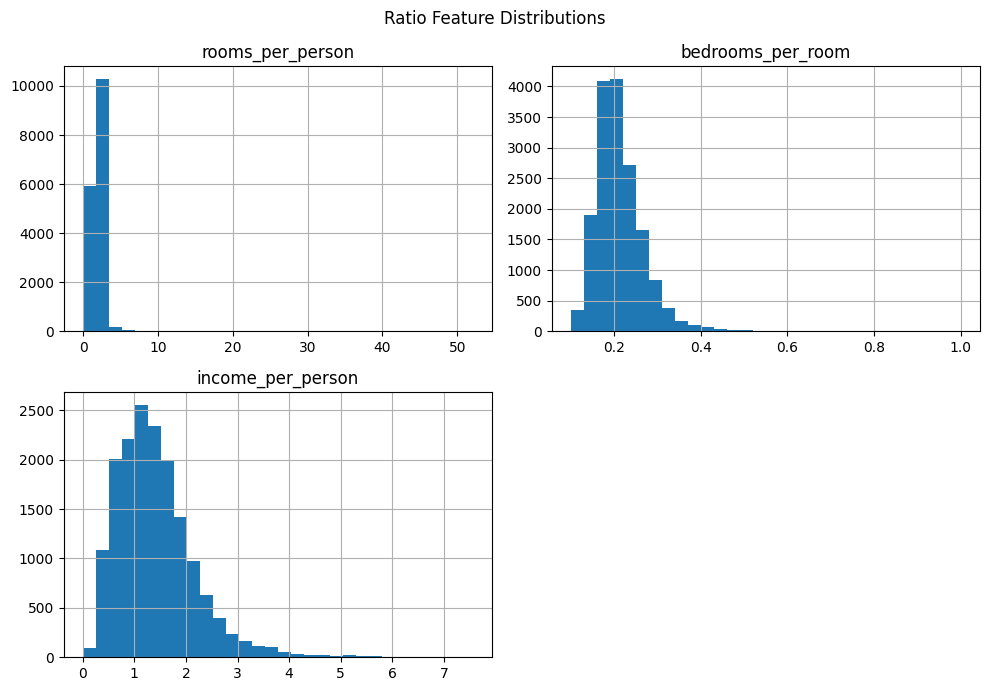

In [36]:
X_train_p2[
    ["rooms_per_person", "bedrooms_per_room", "income_per_person"]
].hist(bins=30, figsize=(10,7))
plt.suptitle("Ratio Feature Distributions")
plt.tight_layout()
plt.show()


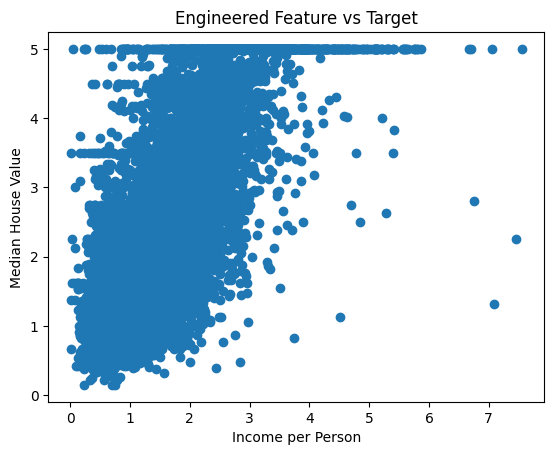

In [38]:
plt.scatter(X_train_p2["income_per_person"], y_train)
plt.xlabel("Income per Person")
plt.ylabel("Median House Value")
plt.title("Engineered Feature vs Target")
plt.show()


In [39]:
X_train_p3 = X_train_p2.copy()
X_test_p3 = X_test_p2.copy()

X_train_p3["rooms_minus_bedrooms"] = (
    X_train_p3["AveRooms"] - X_train_p3["AveBedrms"]
)
X_test_p3["rooms_minus_bedrooms"] = (
    X_test_p3["AveRooms"] - X_test_p3["AveBedrms"]
)

X_train_p3["age_income_gap"] = (
    X_train_p3["HouseAge"] - X_train_p3["MedInc"]
)
X_test_p3["age_income_gap"] = (
    X_test_p3["HouseAge"] - X_test_p3["MedInc"]
)


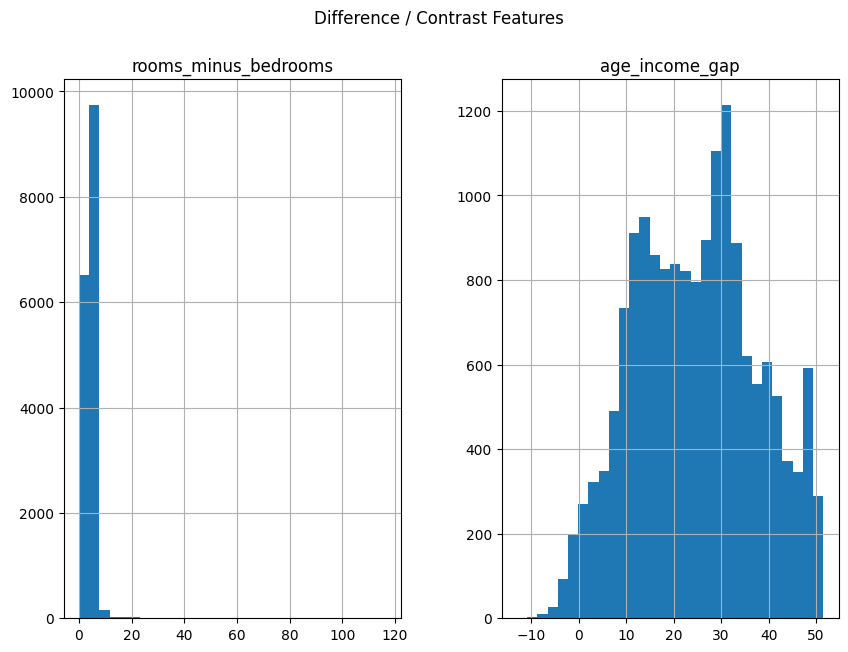

In [40]:
X_train_p3[["rooms_minus_bedrooms", "age_income_gap"]].hist(
    bins=30, figsize=(10,7)
)
plt.suptitle("Difference / Contrast Features")
plt.show()


In [41]:
pd.DataFrame({
    "phase": ["Raw", "After Phase 1", "After Phase 2", "After Phase 3"],
    "num_features": [
        X_train.shape[1],
        X_train_p1.shape[1],
        X_train_p2.shape[1],
        X_train_p3.shape[1]
    ]
})


,phase,num_features
0,Raw,8
1,After Phase 1,13
2,After Phase 2,16
3,After Phase 3,18


# Baseline

In [50]:
from sklearn.linear_model import LinearRegression

X_train_base = X_train.copy()
X_test_base = X_test.copy()

numerical_cols_base = X_train_base.columns.tolist()

baseline_model = LinearRegression()


In [51]:
baseline_metrics, baseline_errors = run_pipeline(
    X_train=X_train_base,
    X_test=X_test_base,
    y_train=y_train,
    y_test=y_test,
    model=baseline_model,
    numerical_cols=numerical_cols_base,
    categorical_cols=[],
    task_type="regression"
)

print(baseline_metrics)
baseline_rmse = baseline_metrics["test"]["rmse"]
baseline_rmse



{'train': {'rmse': 0.7196757085831575, 'mae': 0.5286283596581934}, 'test': {'rmse': 0.7455813830127764, 'mae': 0.5332001304956565}}


0.7455813830127764

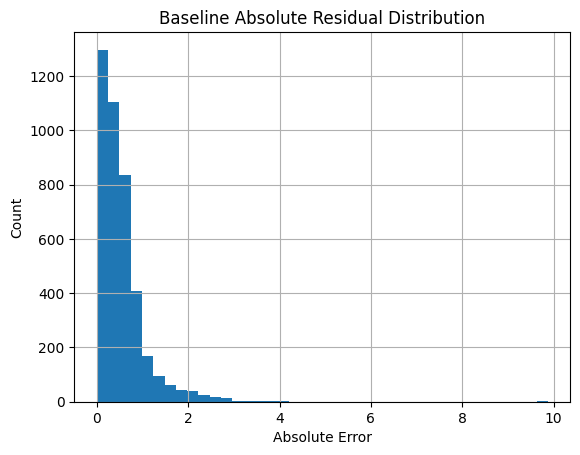

In [52]:
plt.figure()
baseline_errors["abs_residual"].hist(bins=40)
plt.title("Baseline Absolute Residual Distribution")
plt.xlabel("Absolute Error")
plt.ylabel("Count")
plt.show()


In [54]:
numerical_cols_p3 = X_train_p3.columns.tolist()

model = LinearRegression()

p3_metrics, p3_errors = run_pipeline(
    X_train=X_train_p3,
    X_test=X_test_p3,
    y_train=y_train,
    y_test=y_test,
    model=model,
    numerical_cols=numerical_cols_p3,
    categorical_cols=[],
    task_type="regression"
)

p3_metrics


{'train': {'rmse': 0.6510271931956495, 'mae': 0.46913080046820965},
 'test': {'rmse': 0.6610488186724188, 'mae': 0.47386729505714154}}

In [55]:
comparison_df = pd.DataFrame({
    "Stage": ["Baseline", "Phase 1–3"],
    "Test RMSE": [baseline_rmse, p3_metrics["test"]["rmse"]],
    "Delta RMSE": [
        0,
        p3_metrics["test"]["rmse"] - baseline_rmse
    ]
})

comparison_df


,Stage,Test RMSE,Delta RMSE
0,Baseline,0.745581,0.000000
1,Phase 1–3,0.661049,-0.084533


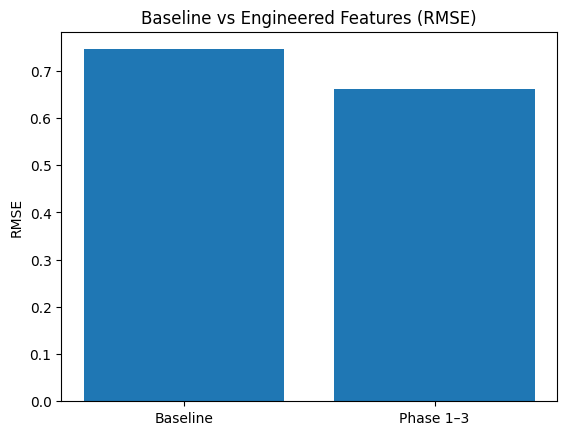

In [56]:
plt.figure()
plt.bar(
    comparison_df["Stage"],
    comparison_df["Test RMSE"]
)
plt.title("Baseline vs Engineered Features (RMSE)")
plt.ylabel("RMSE")
plt.show()


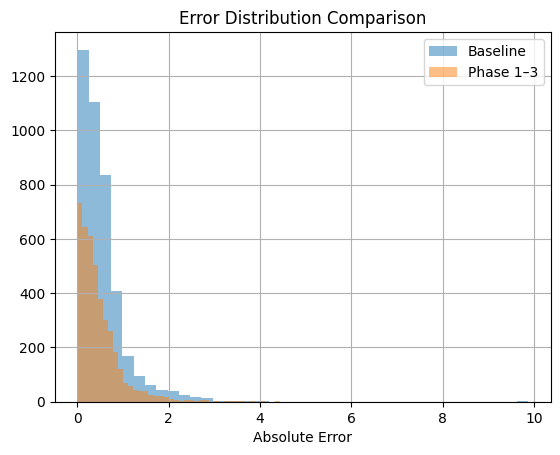

In [57]:
plt.figure()
baseline_errors["abs_residual"].hist(
    bins=40, alpha=0.5, label="Baseline"
)
p3_errors["abs_residual"].hist(
    bins=40, alpha=0.5, label="Phase 1–3"
)
plt.legend()
plt.title("Error Distribution Comparison")
plt.xlabel("Absolute Error")
plt.show()


In [58]:
X_train_p4 = X_train_p3.copy()
X_test_p4 = X_test_p3.copy()

medinc_median = X_train_p4["MedInc"].median()
age_q75 = X_train_p4["HouseAge"].quantile(0.75)
pop_q75 = X_train_p4["Population"].quantile(0.75)

X_train_p4["high_income"] = (X_train_p4["MedInc"] > medinc_median).astype(int)
X_test_p4["high_income"] = (X_test_p4["MedInc"] > medinc_median).astype(int)

X_train_p4["old_house"] = (X_train_p4["HouseAge"] > age_q75).astype(int)
X_test_p4["old_house"] = (X_test_p4["HouseAge"] > age_q75).astype(int)

X_train_p4["high_population"] = (X_train_p4["Population"] > pop_q75).astype(int)
X_test_p4["high_population"] = (X_test_p4["Population"] > pop_q75).astype(int)


In [59]:
X_train_p4[["high_income", "old_house", "high_population"]].mean()


high_income        0.500000
old_house          0.238614
high_population    0.249576
dtype: float64

In [60]:
numerical_cols_p4 = X_train_p4.columns.tolist()

p4_metrics, p4_errors = run_pipeline(
    X_train=X_train_p4,
    X_test=X_test_p4,
    y_train=y_train,
    y_test=y_test,
    model=LinearRegression(),
    numerical_cols=numerical_cols_p4,
    categorical_cols=[],
    task_type="regression"
)

p4_metrics


{'train': {'rmse': 0.6506748461178565, 'mae': 0.4695215998729883},
 'test': {'rmse': 0.6604730314569658, 'mae': 0.4738437831531586}}

In [61]:
X_train_p5 = X_train_p4.copy()
X_test_p5 = X_test_p4.copy()

lat_bins = X_train_p5["Latitude"].quantile([0.33, 0.66]).values

X_train_p5["lat_region"] = np.digitize(X_train_p5["Latitude"], lat_bins)
X_test_p5["lat_region"] = np.digitize(X_test_p5["Latitude"], lat_bins)

lon_bins = X_train_p5["Longitude"].quantile([0.33, 0.66]).values

X_train_p5["lon_region"] = np.digitize(X_train_p5["Longitude"], lon_bins)
X_test_p5["lon_region"] = np.digitize(X_test_p5["Longitude"], lon_bins)


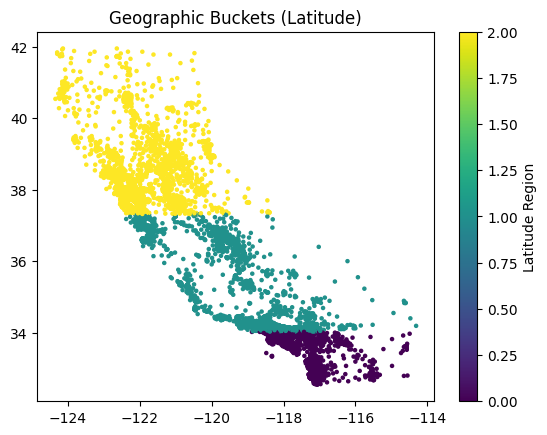

In [72]:
plt.figure()
plt.scatter(
    X_train_p5["Longitude"],
    X_train_p5["Latitude"],
    c=X_train_p5["lat_region"],
    cmap="viridis",
    s=5
)
plt.colorbar(label="Latitude Region")
plt.title("Geographic Buckets (Latitude)")
plt.show()


In [73]:
numerical_cols_p5 = X_train_p5.columns.tolist()

p5_metrics, p5_errors = run_pipeline(
    X_train=X_train_p5,
    X_test=X_test_p5,
    y_train=y_train,
    y_test=y_test,
    model=LinearRegression(),
    numerical_cols=numerical_cols_p5,
    categorical_cols=[],
    task_type="regression"
)

p5_metrics


{'train': {'rmse': 0.6485384689277129, 'mae': 0.4694595098805561},
 'test': {'rmse': 0.6590784295179238, 'mae': 0.47402010223957064}}

In [74]:
summary_df = pd.DataFrame({
    "Stage": ["Baseline", "Phase 1–3", "Phase 4", "Phase 5"],
    "Test RMSE": [
        baseline_rmse,
        p3_metrics["test"]["rmse"],
        p4_metrics["test"]["rmse"],
        p5_metrics["test"]["rmse"],
    ]
})

summary_df


,Stage,Test RMSE
0,Baseline,0.745581
1,Phase 1–3,0.661049
2,Phase 4,0.660473
3,Phase 5,0.659078


In [75]:
pd.DataFrame({
    "phase": ["Raw", "After Phase 1", "After Phase 2", "After Phase 3","After Phase 4","After Phase 5"],
    "num_features": [
        X_train.shape[1],
        X_train_p1.shape[1],
        X_train_p2.shape[1],
        X_train_p3.shape[1], 
        X_train_p4.shape[1],
        X_train_p5.shape[1]
    ]
})


,phase,num_features
0,Raw,8
1,After Phase 1,13
2,After Phase 2,16
3,After Phase 3,18
4,After Phase 4,21
5,After Phase 5,23


In [76]:
from sklearn.cluster import KMeans

X_train_p6 = X_train_p5.copy()
X_test_p6 = X_test_p5.copy()

geo_features_train = X_train_p6[["Latitude", "Longitude"]]
geo_features_test = X_test_p6[["Latitude", "Longitude"]]

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(geo_features_train)

X_train_p6["geo_cluster"] = kmeans.predict(geo_features_train)
X_test_p6["geo_cluster"] = kmeans.predict(geo_features_test)


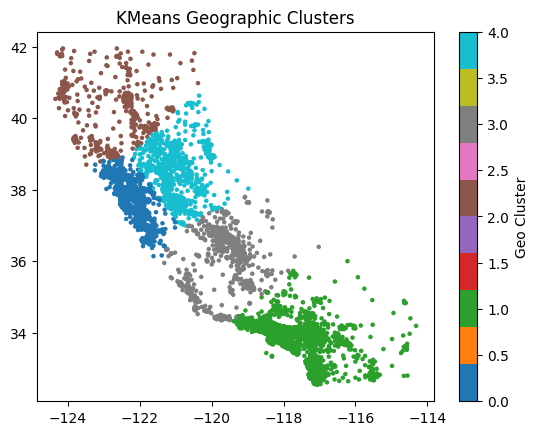

In [77]:
plt.figure()
plt.scatter(
    X_train_p6["Longitude"],
    X_train_p6["Latitude"],
    c=X_train_p6["geo_cluster"],
    cmap="tab10",
    s=5
)
plt.colorbar(label="Geo Cluster")
plt.title("KMeans Geographic Clusters")
plt.show()


In [78]:
numerical_cols_p6 = X_train_p6.columns.tolist()

p6_metrics, p6_errors = run_pipeline(
    X_train=X_train_p6,
    X_test=X_test_p6,
    y_train=y_train,
    y_test=y_test,
    model=LinearRegression(),
    numerical_cols=numerical_cols_p6,
    categorical_cols=[],
    task_type="regression"
)

p6_metrics


{'train': {'rmse': 0.6467740535775314, 'mae': 0.4678239242191366},
 'test': {'rmse': 0.6569563261314141, 'mae': 0.47165492839242545}}

In [79]:
X_train_p7 = X_train_p6.copy()
X_test_p7 = X_test_p6.copy()

X_train_p7["size_score"] = X_train_p7[["AveRooms", "AveBedrms"]].mean(axis=1)
X_test_p7["size_score"] = X_test_p7[["AveRooms", "AveBedrms"]].mean(axis=1)

X_train_p7["crowding_score"] = X_train_p7[["Population", "AveOccup"]].mean(axis=1)
X_test_p7["crowding_score"] = X_test_p7[["Population", "AveOccup"]].mean(axis=1)

X_train_p7["geo_score"] = X_train_p7[["Latitude", "Longitude"]].mean(axis=1)
X_test_p7["geo_score"] = X_test_p7[["Latitude", "Longitude"]].mean(axis=1)


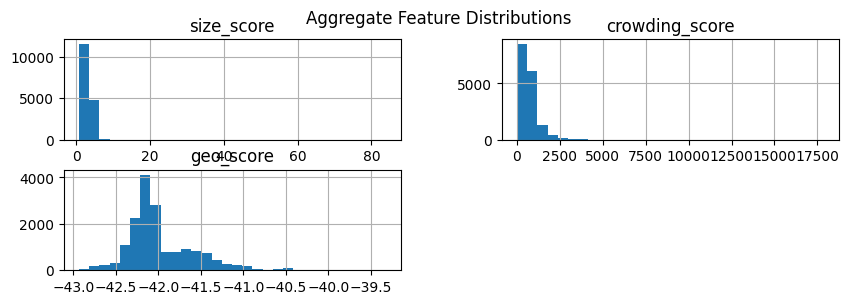

In [80]:
X_train_p7[["size_score", "crowding_score", "geo_score"]].hist(
    bins=30, figsize=(10,3)
)
plt.suptitle("Aggregate Feature Distributions")
plt.show()


In [81]:
numerical_cols_p7 = X_train_p7.columns.tolist()

p7_metrics, p7_errors = run_pipeline(
    X_train=X_train_p7,
    X_test=X_test_p7,
    y_train=y_train,
    y_test=y_test,
    model=LinearRegression(),
    numerical_cols=numerical_cols_p7,
    categorical_cols=[],
    task_type="regression"
)

p7_metrics


{'train': {'rmse': 0.6467740535775314, 'mae': 0.4678239242191366},
 'test': {'rmse': 0.6569563261314141, 'mae': 0.4716549283924254}}

In [82]:
X_train_p8 = X_train_p7.copy()
X_test_p8 = X_test_p7.copy()

X_train_p8["income_x_rooms"] = X_train_p8["MedInc"] * X_train_p8["AveRooms"]
X_test_p8["income_x_rooms"] = X_test_p8["MedInc"] * X_test_p8["AveRooms"]

X_train_p8["age_x_rooms"] = X_train_p8["HouseAge"] * X_train_p8["AveRooms"]
X_test_p8["age_x_rooms"] = X_test_p8["HouseAge"] * X_test_p8["AveRooms"]

X_train_p8["lat_x_lon"] = X_train_p8["Latitude"] * X_train_p8["Longitude"]
X_test_p8["lat_x_lon"] = X_test_p8["Latitude"] * X_test_p8["Longitude"]


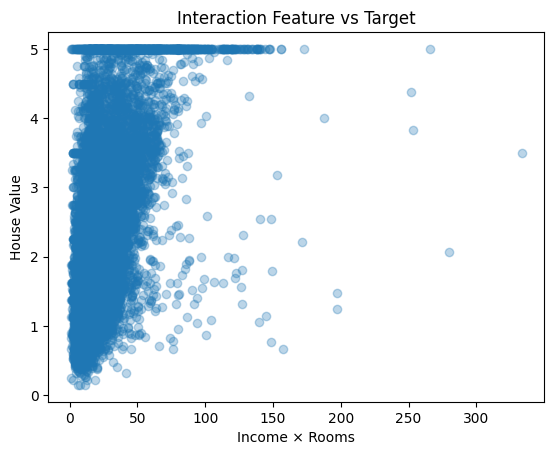

In [83]:
plt.scatter(X_train_p8["income_x_rooms"], y_train, alpha=0.3)
plt.xlabel("Income × Rooms")
plt.ylabel("House Value")
plt.title("Interaction Feature vs Target")
plt.show()


In [85]:
numerical_cols_p8 = X_train_p8.columns.tolist()

p8_metrics, p8_errors = run_pipeline(
    X_train=X_train_p8,
    X_test=X_test_p8,
    y_train=y_train,
    y_test=y_test,
    model=LinearRegression(),
    numerical_cols=numerical_cols_p8,
    categorical_cols=[],
    task_type="regression"
)

p8_metrics


{'train': {'rmse': 0.6451297149374833, 'mae': 0.4662529516072572},
 'test': {'rmse': 0.6602700620114575, 'mae': 0.4712825008854314}}

In [86]:
final_summary = pd.DataFrame({
    "Stage": [
        "Baseline",
        "Phase 1–3",
        "Phase 4",
        "Phase 5",
        "Phase 6 (KMeans)",
        "Phase 7 (Aggregates)",
        "Phase 8 (Interactions)"
    ],
    "Test RMSE": [
        baseline_rmse,
        p3_metrics["test"]["rmse"],
        p4_metrics["test"]["rmse"],
        p5_metrics["test"]["rmse"],
        p6_metrics["test"]["rmse"],
        p7_metrics["test"]["rmse"],
        p8_metrics["test"]["rmse"],
    ]
})

final_summary


,Stage,Test RMSE
0,Baseline,0.745581
1,Phase 1–3,0.661049
2,Phase 4,0.660473
3,Phase 5,0.659078
4,Phase 6 (KMeans),0.656956
5,Phase 7 (Aggregates),0.656956
6,Phase 8 (Interactions),0.660270


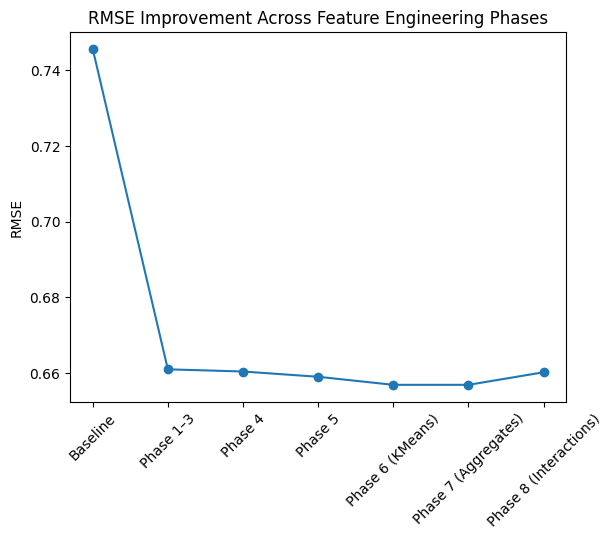

In [87]:
plt.figure()
plt.plot(
    final_summary["Stage"],
    final_summary["Test RMSE"],
    marker="o"
)
plt.xticks(rotation=45)
plt.title("RMSE Improvement Across Feature Engineering Phases")
plt.ylabel("RMSE")
plt.show()


In [89]:
X_train_p8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MedInc                16512 non-null  float64
 1   HouseAge              16512 non-null  float64
 2   AveRooms              16512 non-null  float64
 3   AveBedrms             16512 non-null  float64
 4   Population            16512 non-null  float64
 5   AveOccup              16512 non-null  float64
 6   Latitude              16512 non-null  float64
 7   Longitude             16512 non-null  float64
 8   log_MedInc            16512 non-null  float64
 9   log_Population        16512 non-null  float64
 10  log_AveRooms          16512 non-null  float64
 11  HouseAge_sq           16512 non-null  float64
 12  AveRooms_sq           16512 non-null  float64
 13  rooms_per_person      16512 non-null  float64
 14  bedrooms_per_room     16512 non-null  float64
 15  income_per_person   

# Expanding more features

In [ ]:
core_features = ["MedInc", "AveRooms", "AveOccup", "Population", "HouseAge"]

X_train_e1 = X_train_p8.copy()
X_test_e1 = X_test_p8.copy()

for col in core_features:
    X_train_e1[f"log_{col}"] = np.log(X_train_e1[col] + 1e-6)
    X_test_e1[f"log_{col}"] = np.log(X_test_e1[col] + 1e-6)

    X_train_e1[f"sqrt_{col}"] = np.sqrt(X_train_e1[col])
    X_test_e1[f"sqrt_{col}"] = np.sqrt(X_test_e1[col])

    X_train_e1[f"inv_{col}"] = 1 / (X_train_e1[col] + 1e-6)
    X_test_e1[f"inv_{col}"] = 1 / (X_test_e1[col] + 1e-6)


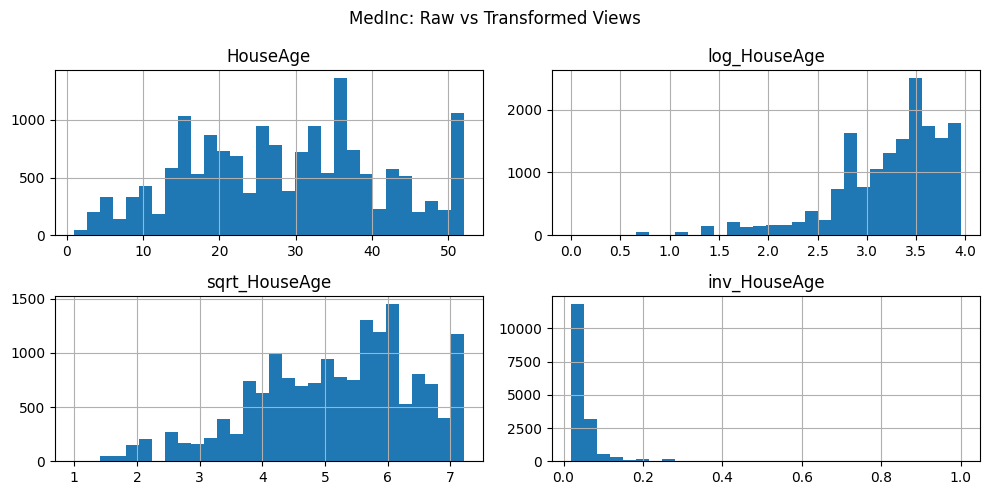

In [99]:
cols = ["HouseAge", "log_HouseAge", "sqrt_HouseAge", "inv_HouseAge"]
X_train_e1[cols].hist(bins=30, figsize=(10,5))
plt.suptitle("MedInc: Raw vs Transformed Views")
plt.tight_layout()
plt.show()


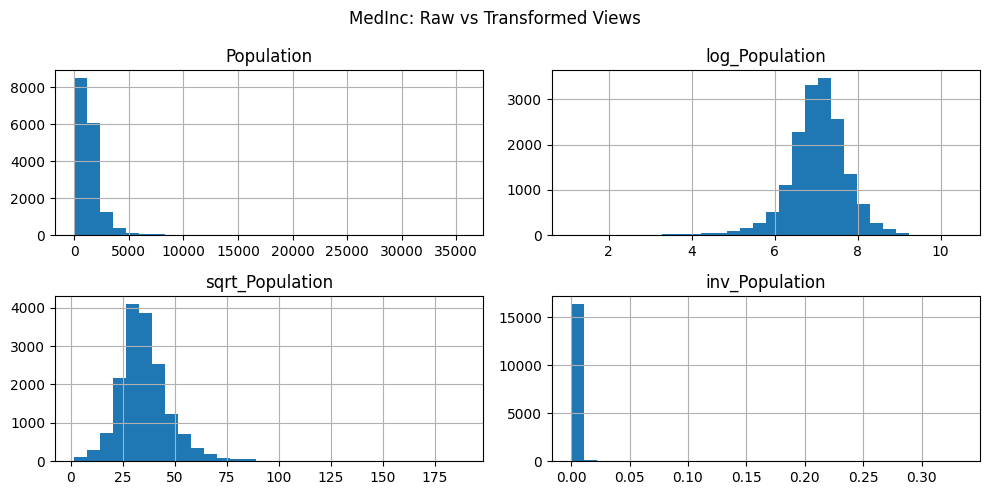

In [97]:
cols = ["Population", "log_Population", "sqrt_Population", "inv_Population"]
X_train_e1[cols].hist(bins=30, figsize=(10,5))
plt.suptitle("MedInc: Raw vs Transformed Views")
plt.tight_layout()
plt.show()


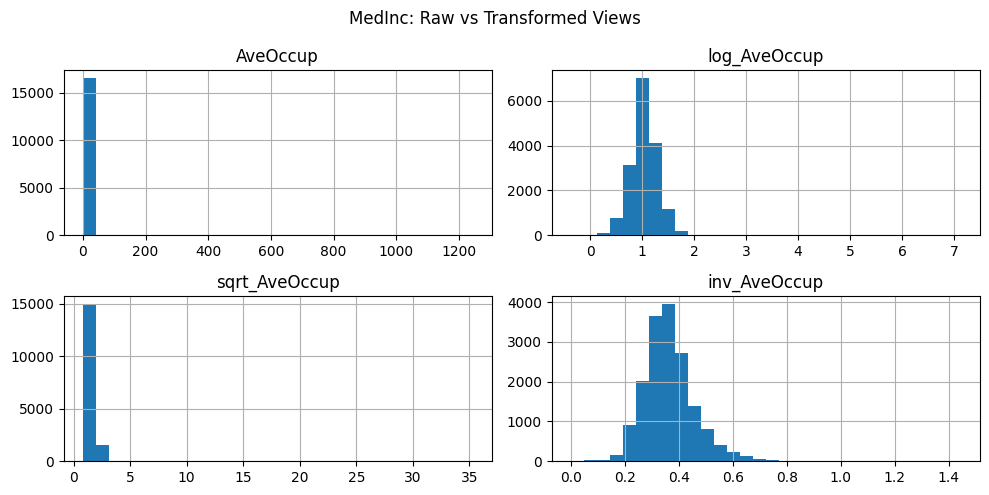

In [96]:
cols = ["AveOccup", "log_AveOccup", "sqrt_AveOccup", "inv_AveOccup"]
X_train_e1[cols].hist(bins=30, figsize=(10,5))
plt.suptitle("MedInc: Raw vs Transformed Views")
plt.tight_layout()
plt.show()


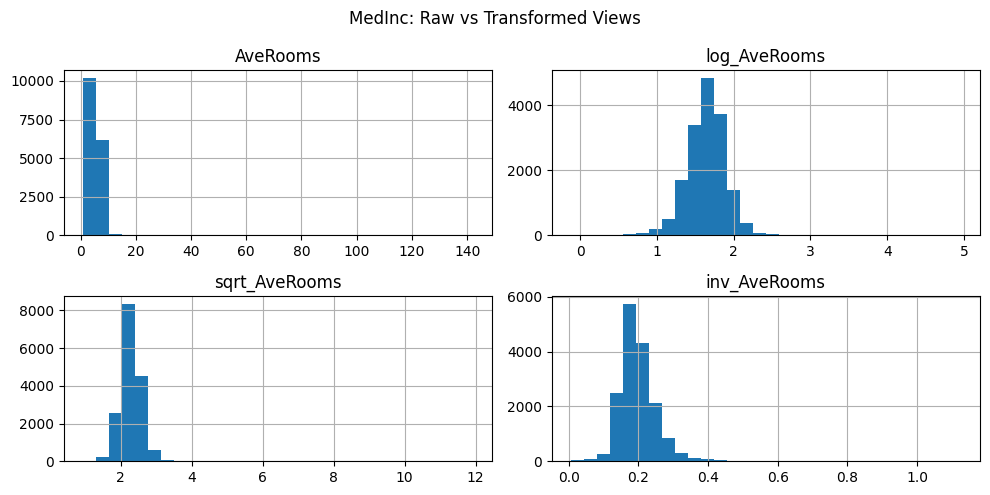

In [95]:
cols = ["AveRooms", "log_AveRooms", "sqrt_AveRooms", "inv_AveRooms"]
X_train_e1[cols].hist(bins=30, figsize=(10,5))
plt.suptitle("MedInc: Raw vs Transformed Views")
plt.tight_layout()
plt.show()


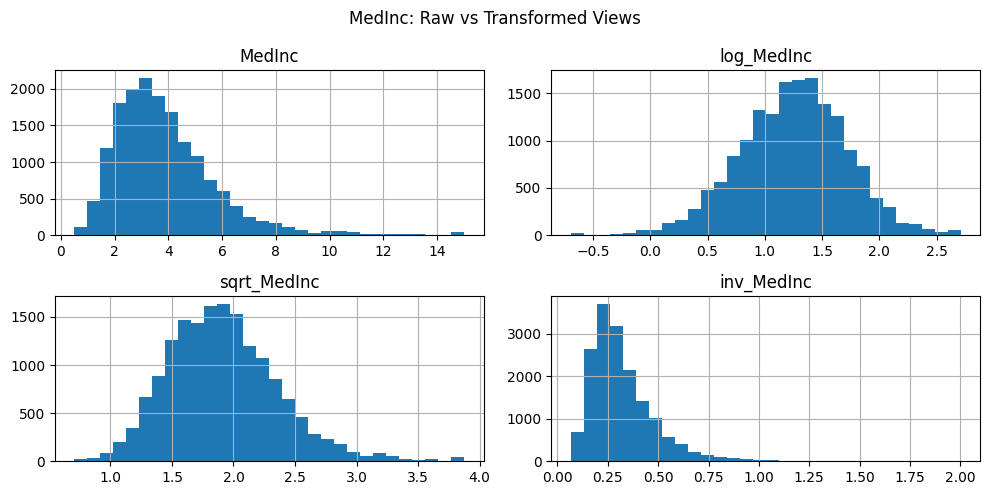

In [94]:
cols = ["MedInc", "log_MedInc", "sqrt_MedInc", "inv_MedInc"]
X_train_e1[cols].hist(bins=30, figsize=(10,5))
plt.suptitle("MedInc: Raw vs Transformed Views")
plt.tight_layout()
plt.show()


In [101]:
X_train_e2 = X_train_e1.copy()
X_test_e2 = X_test_e1.copy()

bin_features = ["MedInc", "HouseAge", "Population", "AveRooms"]

for col in bin_features:
    bins = X_train_e2[col].quantile([0.2, 0.4, 0.6, 0.8]).values
    X_train_e2[f"{col}_bin"] = np.digitize(X_train_e2[col], bins)
    X_test_e2[f"{col}_bin"] = np.digitize(X_test_e2[col], bins)


In [102]:
X_train_e2[[f"{c}_bin" for c in bin_features]].describe()


,MedInc_bin,HouseAge_bin,Population_bin,AveRooms_bin
count,16512.000000,16512.000000,16512.000000,16512.000000
mean,2.000121,2.021136,2.000666,2.000061
std,1.414385,1.414891,1.414406,1.414321
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000


In [103]:
pd.DataFrame({
    "Stage": ["After Expansion A", "After Expansion B"],
    "Num Features": [
        X_train_e1.shape[1],
        X_train_e2.shape[1]
    ]
})


,Stage,Num Features
0,After Expansion A,42
1,After Expansion B,46


In [104]:
X_train_e3 = X_train_e2.copy()
X_test_e3 = X_test_e2.copy()

X_train_e3["people_per_room"] = X_train_e3["AveOccup"] / (X_train_e3["AveRooms"] + 1e-6)
X_test_e3["people_per_room"] = X_test_e3["AveOccup"] / (X_test_e3["AveRooms"] + 1e-6)

X_train_e3["income_per_room"] = X_train_e3["MedInc"] / (X_train_e3["AveRooms"] + 1e-6)
X_test_e3["income_per_room"] = X_test_e3["MedInc"] / (X_test_e3["AveRooms"] + 1e-6)

X_train_e3["population_per_age"] = X_train_e3["Population"] / (X_train_e3["HouseAge"] + 1e-6)
X_test_e3["population_per_age"] = X_test_e3["Population"] / (X_test_e3["HouseAge"] + 1e-6)


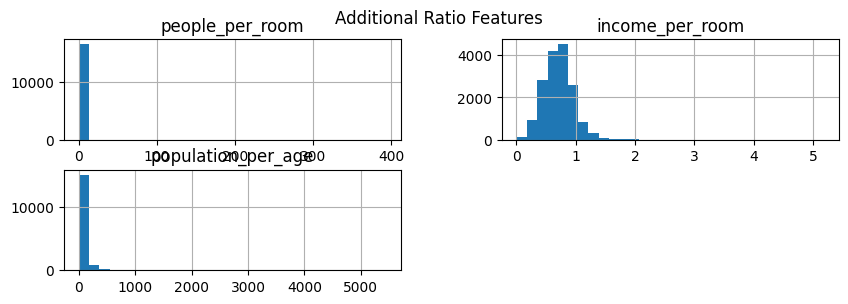

In [105]:
X_train_e3[
    ["people_per_room", "income_per_room", "population_per_age"]
].hist(bins=30, figsize=(10,3))
plt.suptitle("Additional Ratio Features")
plt.show()


In [106]:
X_train_e4 = X_train_e3.copy()
X_test_e4 = X_test_e3.copy()

# Approximate coast (longitude ~ -120)
X_train_e4["dist_to_coast"] = np.abs(X_train_e4["Longitude"] + 120)
X_test_e4["dist_to_coast"] = np.abs(X_test_e4["Longitude"] + 120)

# Distance to state center
lat_center, lon_center = 36.5, -119.5
X_train_e4["dist_to_center"] = np.sqrt(
    (X_train_e4["Latitude"] - lat_center)**2 +
    (X_train_e4["Longitude"] - lon_center)**2
)
X_test_e4["dist_to_center"] = np.sqrt(
    (X_test_e4["Latitude"] - lat_center)**2 +
    (X_test_e4["Longitude"] - lon_center)**2
)


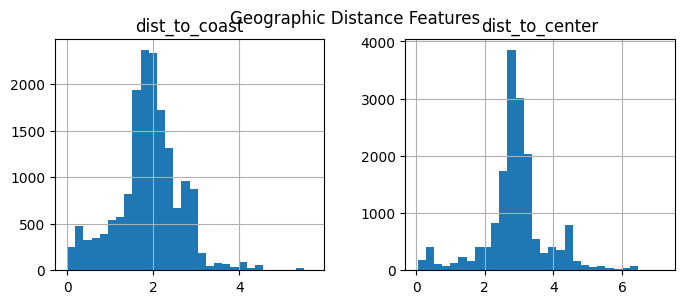

In [107]:
X_train_e4[["dist_to_coast", "dist_to_center"]].hist(
    bins=30, figsize=(8,3)
)
plt.suptitle("Geographic Distance Features")
plt.show()


In [109]:
final_feature_count = X_train_e4.shape[1]

pd.DataFrame({
    "Stage": ["Final Feature Set"],
    "Num Features": [final_feature_count]
})


,Stage,Num Features
0,Final Feature Set,51


In [139]:
X_train_final = X_train_e4
X_test_final = X_test_e4
X_final_data=pd.concat([X_train_final,X_test_final],axis=0)
y_final_data=pd.concat([y_train,y_test],axis=0)
final_data=pd.concat([X_final_data,y_final_data],axis=1)

final_data.to_csv("featured_housing.csv", index=False)
final_data.columns


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'log_MedInc', 'log_Population', 'log_AveRooms',
       'HouseAge_sq', 'AveRooms_sq', 'rooms_per_person', 'bedrooms_per_room',
       'income_per_person', 'rooms_minus_bedrooms', 'age_income_gap',
       'high_income', 'old_house', 'high_population', 'lat_region',
       'lon_region', 'geo_cluster', 'size_score', 'crowding_score',
       'geo_score', 'income_x_rooms', 'age_x_rooms', 'lat_x_lon',
       'sqrt_MedInc', 'inv_MedInc', 'sqrt_AveRooms', 'inv_AveRooms',
       'log_AveOccup', 'sqrt_AveOccup', 'inv_AveOccup', 'sqrt_Population',
       'inv_Population', 'log_HouseAge', 'sqrt_HouseAge', 'inv_HouseAge',
       'MedInc_bin', 'HouseAge_bin', 'Population_bin', 'AveRooms_bin',
       'people_per_room', 'income_per_room', 'population_per_age',
       'dist_to_coast', 'dist_to_center', 'MedHouseVal'],
      dtype='object')

In [ ]:

X_test_final.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,log_MedInc,log_Population,...,inv_HouseAge,MedInc_bin,HouseAge_bin,Population_bin,AveRooms_bin,people_per_room,income_per_room,population_per_age,dist_to_coast,dist_to_center
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.00000,4128.00000,4128.000000,4128.000000,...,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,3.830338,28.764293,5.404059,1.096637,1421.571705,2.965431,35.58671,-119.51936,1.235296,7.018745,...,0.048620,1.958333,2.044331,1.978682,1.938953,0.596979,0.712472,83.814227,1.907505,2.911865
std,1.881515,12.518304,2.794717,0.610196,1114.023136,1.753316,2.13276,1.99447,0.466254,0.744593,...,0.047980,1.401204,1.408452,1.422595,1.411007,0.370319,0.251666,195.258466,0.754668,0.938207
min,0.499900,1.000000,0.846154,0.500000,8.000000,1.263566,32.54000,-124.19000,-0.693345,2.079442,...,0.019231,0.000000,0.000000,0.000000,0.000000,0.018109,0.034897,0.307692,0.000000,0.020000
25%,2.548500,18.000000,4.396633,1.004338,781.000000,2.435365,33.93000,-121.69000,0.935505,6.660575,...,0.027027,1.000000,1.000000,1.000000,1.000000,0.439154,0.540741,23.358776,1.560000,2.587364
50%,3.500000,29.000000,5.192764,1.046715,1160.000000,2.823586,34.23000,-118.47000,1.252763,7.056175,...,0.034483,2.000000,2.000000,2.000000,2.000000,0.519279,0.705824,41.058291,1.910000,2.885325
75%,4.645925,37.000000,6.008889,1.095908,1722.000000,3.289374,37.70000,-117.99000,1.535991,7.451242,...,0.055556,3.000000,3.000000,3.000000,3.000000,0.661491,0.856096,79.097219,2.320000,3.205402
max,15.000100,52.000000,132.533333,34.066667,16122.000000,83.171429,41.81000,-114.58000,2.708057,9.687940,...,0.999999,4.000000,4.000000,4.000000,4.000000,16.232339,3.397723,4325.997837,5.420000,7.058229
